<a href="https://colab.research.google.com/github/ali-talebi/Task_sf/blob/main/S_F2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns  
import numpy as np 
import datetime as dt

In [3]:
df = pd.read_csv("/content/drive/MyDrive/snap_food/Data analyst Task.csv") 

In [4]:
df 

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,4/12/2021,10000,1.0,12000
1,2,2,5/9/2021,0,NaN,20000
2,3,3,5/9/2021,10000,1.0,14000
3,4,4,11/10/2021,0,NaN,15000
4,5,5,11/10/2021,10000,1.0,16000
...,...,...,...,...,...,...
29052,29053,6622,7/31/2022,0,NaN,18000
29053,29054,9985,7/31/2022,0,NaN,25000
29054,29055,8843,7/31/2022,6000,1.0,24000
29055,29056,8703,7/31/2022,0,NaN,40000


In [7]:
df["created_at"] = pd.to_datetime(df["created_at"] , errors = "coerce" )

In [8]:
df 

,order_id,user_id,created_at,discount_cost,discount_type,basket
0,1,1,2021-04-12,10000,1.0,12000
1,2,2,2021-05-09,0,NaN,20000
2,3,3,2021-05-09,10000,1.0,14000
3,4,4,2021-11-10,0,NaN,15000
4,5,5,2021-11-10,10000,1.0,16000
...,...,...,...,...,...,...
29052,29053,6622,2022-07-31,0,NaN,18000
29053,29054,9985,2022-07-31,0,NaN,25000
29054,29055,8843,2022-07-31,6000,1.0,24000
29055,29056,8703,2022-07-31,0,NaN,40000


In [9]:
df = pd.DataFrame(df.groupby(["created_at","user_id"]).agg({'order_id':max , 'basket':sum})).reset_index() 

In [13]:
df 

,created_at,user_id,order_id,basket
0,2021-04-12,1,1,12000
1,2021-05-09,2,2,20000
2,2021-05-09,3,3,14000
3,2021-11-10,4,4,15000
4,2021-11-10,5,5,16000
...,...,...,...,...
28513,2022-07-31,9981,29031,24000
28514,2022-07-31,9982,29034,30000
28515,2022-07-31,9983,29036,21000
28516,2022-07-31,9984,29039,22000


In [14]:
df['tx_month'] = df['created_at'].apply(lambda x: dt.date(x.year, x.month,1))


In [15]:
df['acq_month'] = df.groupby('user_id')['tx_month'].transform('min')

In [19]:
df.tail(50)

,created_at,user_id,order_id,basket,tx_month,acq_month
28468,2022-07-31,9156,28953,24000,2022-07-01,2022-07-01
28469,2022-07-31,9204,28958,21000,2022-07-01,2022-07-01
28470,2022-07-31,9268,28897,11500,2022-07-01,2022-07-01
28471,2022-07-31,9283,28987,39000,2022-07-01,2022-07-01
28472,2022-07-31,9329,28995,35000,2022-07-01,2022-07-01
28473,2022-07-31,9370,28956,20800,2022-07-01,2022-07-01
28474,2022-07-31,9496,29017,50000,2022-07-01,2022-07-01
28475,2022-07-31,9558,28893,45000,2022-07-01,2022-07-01
28476,2022-07-31,9627,28934,45000,2022-07-01,2022-07-01
28477,2022-07-31,9796,29002,22500,2022-07-01,2022-07-01


In [20]:
def diff_month(x):

    d1 = x['tx_month']

    d2 = x["acq_month"]

    return ((d1.year - d2.year) * 12 + d1.month - d2.month)+1


df['cohort_idx'] = df.apply(lambda x: diff_month(x), axis=1)


In [23]:
df.head(50)  

,created_at,user_id,order_id,basket,tx_month,acq_month,cohort_idx
0,2021-04-12,1,1,12000,2021-04-01,2021-04-01,1
1,2021-05-09,2,2,20000,2021-05-01,2021-05-01,1
2,2021-05-09,3,3,14000,2021-05-01,2021-05-01,1
3,2021-11-10,4,4,15000,2021-11-01,2021-11-01,1
4,2021-11-10,5,5,16000,2021-11-01,2021-11-01,1
5,2022-01-01,6,6,10000,2022-01-01,2022-01-01,1
6,2022-01-01,7,7,29500,2022-01-01,2022-01-01,1
7,2022-01-01,8,8,10000,2022-01-01,2022-01-01,1
8,2022-01-01,9,9,5000,2022-01-01,2022-01-01,1
9,2022-01-01,10,10,35000,2022-01-01,2022-01-01,1


In [24]:
def get_cohort_matrix(data, var='user_id', fun=pd.Series.nunique):

    cd = data.groupby(['acq_month', 'cohort_idx'])[var].apply(fun).reset_index()

    cc = cd.pivot_table(index = 'acq_month',

                        columns = 'cohort_idx',

                        values = var)

    cs = cc.iloc[:,0]

    retention = cc.divide(cs, axis = 0)

    retention = retention.round(3) * 100

    return cc, retention

In [25]:
cc, retention = get_cohort_matrix(df)

In [26]:
cc

cohort_idx,1,2,3,4,5,6,7,11,12,14,15
acq_month,,,,,,,,,,,
2021-04-01,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2021-05-01,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0
2021-11-01,2.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
2022-01-01,1491.0,457.0,365.0,378.0,316.0,317.0,324.0,NaN,NaN,NaN,NaN
2022-02-01,1539.0,385.0,393.0,362.0,354.0,337.0,NaN,NaN,NaN,NaN,NaN
2022-03-01,1255.0,305.0,274.0,259.0,276.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,1592.0,421.0,389.0,391.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01,1192.0,352.0,287.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-01,1396.0,405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


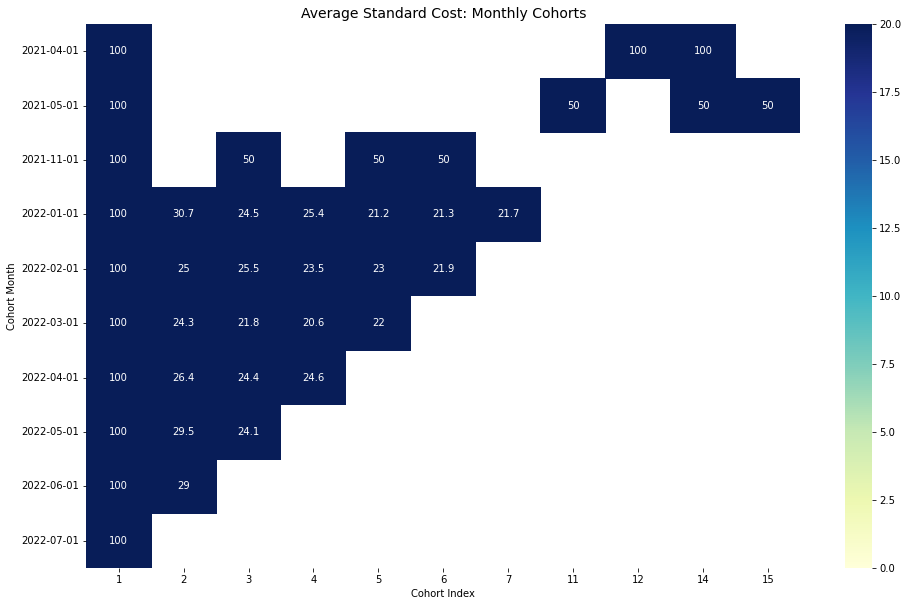

In [28]:
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(retention , annot = True,vmin = 0.0, vmax =20,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()

In [30]:
cc_sa, ret_sa = get_cohort_matrix( df, var='basket', fun=pd.Series.median )

cc_sa

cohort_idx,1,2,3,4,5,6,7,11,12,14,15
acq_month,,,,,,,,,,,
2021-04-01,12000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5700.0,6800.0,NaN
2021-05-01,17000.0,NaN,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,41000.0,15750.0
2021-11-01,15500.0,NaN,15500.0,NaN,27000.0,27600.0,NaN,NaN,NaN,NaN,NaN
2022-01-01,18000.0,20000.0,20000.0,20000.0,21300.0,23750.0,24000.0,NaN,NaN,NaN,NaN
2022-02-01,18000.0,20000.0,20000.0,21000.0,24000.0,24000.0,NaN,NaN,NaN,NaN,NaN
2022-03-01,16750.0,20000.0,20000.0,21000.0,23375.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,20000.0,21500.0,22900.0,24000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01,18000.0,20000.0,22000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-01,20000.0,24000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


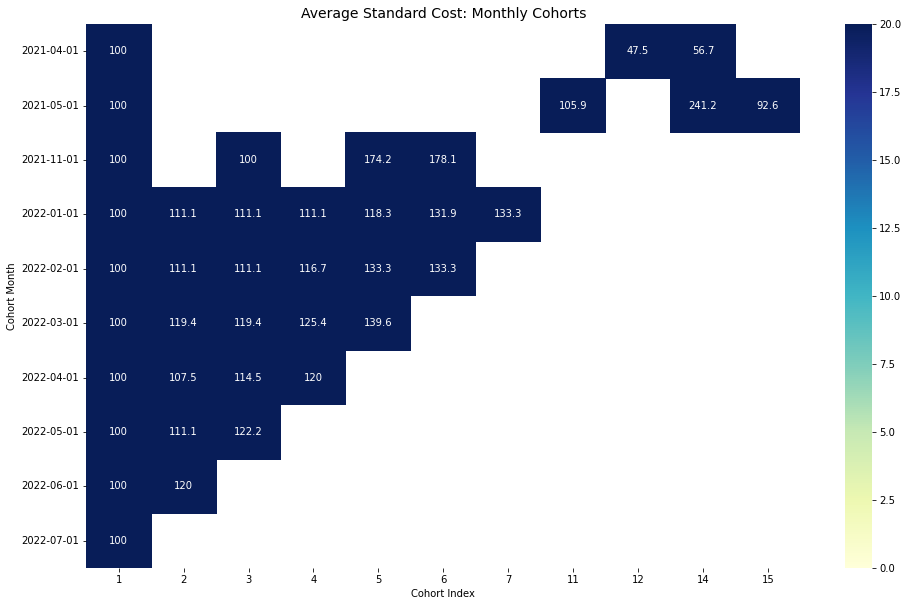

In [31]:
# Initialize the figure
plt.figure(figsize=(16, 10))
# Adding a title
plt.title('Average Standard Cost: Monthly Cohorts', fontsize = 14)
# Creating the heatmap
sns.heatmap(ret_sa , annot = True,vmin = 0.0, vmax =20,cmap="YlGnBu", fmt='g')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()